In [1]:
%matplotlib inline
import cv2 # OpenCV python용 라이브러리
import os, errno # 각 OS에 맞게 경로와 디렉토리 설정을 위한 라이브러리
import numpy as np # 빠른 행렬 연산을 위한 라이브러리
import pandas as pd # data를 쉽게 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지를 출력하기 위한 라이브러리
from tqdm import tqdm_notebook, tqdm # 반복문의 진행정도를 알려주는 라이브러리
from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
jtplot.style(theme='grade3', grid=False) # 설정한 테마에 맞게 plot 스타일 변경, grid 설정 끔
pd.set_option('display.max_colwidth', 1200) # pandas의 DataFrame에서 최대 column 너비를 1200px로 설정
plt.rc('ytick', labelsize=20) # matplotlib의 y축 label size를 20으로 고정
plt.rc('xtick', labelsize=20) # matplotlib의 x축 label size를 20으로 고정

%matplotlib inline
import cv2 # OpenCV python용 라이브러리
import os, errno # 각 OS에 맞게 경로와 디렉토리 설정을 위한 라이브러리
import numpy as np # 빠른 행렬 연산을 위한 라이브러리
import pandas as pd # data를 쉽게 다루기 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지를 출력하기 위한 라이브러리
from tqdm import tqdm_notebook, tqdm # 반복문의 진행정도를 알려주는 라이브러리
from jupyterthemes import jtplot # jupyter theme에 맞게 plot을 해주는 라이브러리
jtplot.style(theme='grade3', grid=False) # 설정한 테마에 맞게 plot 스타일 변경, grid 설정 끔
pd.set_option('display.max_colwidth', 1200) # pandas의 DataFrame에서 최대 column 너비를 1200px로 설정
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)

In [2]:
def make_file_path_data_frame(path):
    file_list = os.listdir(path)
    file_list.sort()
    file_data_frame = pd.DataFrame(file_list, columns = ["file_path"])
    if path[-1] == "/":
        file_data_frame = path + file_data_frame["file_path"]
    else:
        file_data_frame = path + "/" + file_data_frame["file_path"]
    file_data_frame = pd.DataFrame(file_data_frame)
    return file_data_frame

In [3]:
burst_file_names = make_file_path_data_frame("./data/upside_burst/")
burst_file_names.head()

,file_path
0,./data/upside_burst/Cam2_0001.png
1,./data/upside_burst/Cam2_0002.png
2,./data/upside_burst/Cam2_0004.png
3,./data/upside_burst/Cam2_0005.png
4,./data/upside_burst/Cam2_0006.png


In [4]:
stamped_file_names = make_file_path_data_frame("./data/upside_stamped/")
stamped_file_names.head()

,file_path
0,./data/upside_stamped/Cam2_0003.png
1,./data/upside_stamped/Cam2_0008.png
2,./data/upside_stamped/Cam2_0010.png
3,./data/upside_stamped/Cam2_0014.png
4,./data/upside_stamped/Cam2_0016.png


In [5]:
good_file_names = make_file_path_data_frame("./data/upside_good/")
good_file_names.head()

,file_path
0,./data/upside_good/Cam2_001.png
1,./data/upside_good/Cam2_002.png
2,./data/upside_good/Cam2_003.png
3,./data/upside_good/Cam2_004.png
4,./data/upside_good/Cam2_005.png


In [6]:
from PIL import Image, ImageOps

def stage_1_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = ImageOps.box_blur(img_pil, radius=1)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

def stage_1_cv2(filename):
    img = cv2.imread(filename, 0)
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

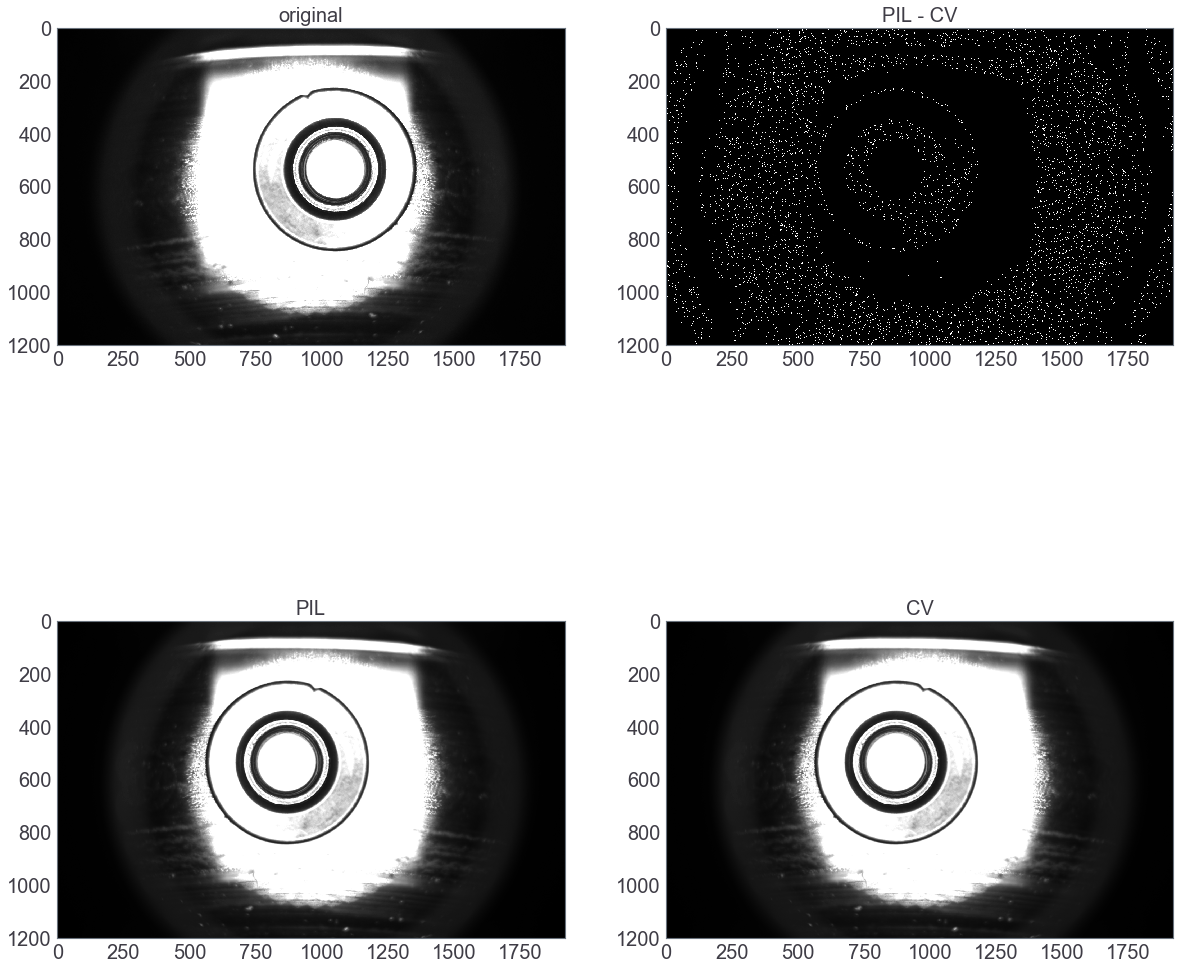

In [7]:
f = burst_file_names["file_path"][0]
r1 = stage_1_PIL(f) 
r2 = stage_1_cv2(f)

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title("original", fontsize = 20)
plt.imshow(cv2.imread(f,0), cmap = "gray")
plt.subplot(222)
plt.title("PIL - CV", fontsize = 20)
plt.imshow(np.abs(r1 - r2), cmap = "gray")
plt.subplot(223)
plt.title("PIL", fontsize = 20)
plt.imshow(r1, cmap = "gray")
plt.subplot(224)
plt.title("CV", fontsize = 20)
plt.imshow(r2, cmap = "gray")

In [8]:
good_file_names.iloc[1][0]


'./data/upside_good/Cam2_002.png'

In [9]:
img = cv2.imread(good_file_names.iloc[0][0],0)
img = cv2.GaussianBlur(img, (3, 3), 0)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

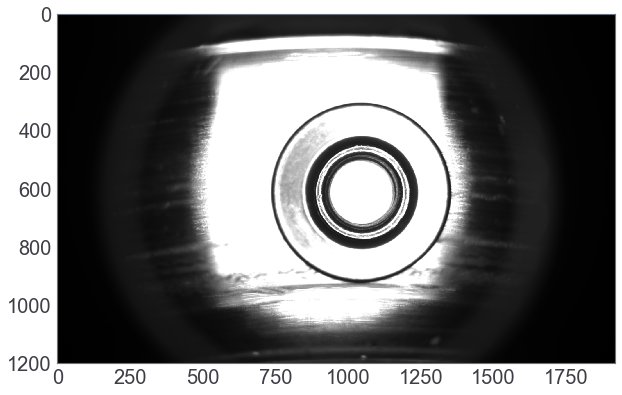

In [10]:
plt.figure(figsize = (10, 20))
plt.imshow(img, cmap = "gray")

In [11]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 80, param1=40,
                           param2=400, minRadius=0, maxRadius=0)

In [12]:
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

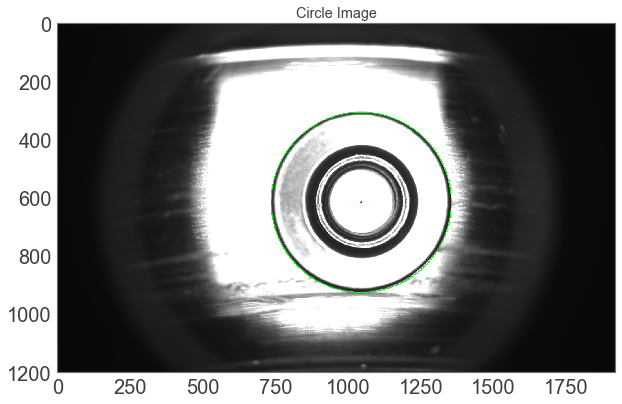

In [13]:
plt.figure(figsize = (10, 20))
plt.imshow(cimg[:,:,::-1], cmap = "gray")
plt.title("Circle Image")
plt.show()

In [14]:
circles

array([[[1046,  616,  310]]], dtype=uint16)

In [18]:
def find_circle(file_names, path):
    num = 0
    for i in range(0, len(file_names)):
        try:
            img = cv2.imread(file_names.iloc[i][0],0)
            img = cv2.GaussianBlur(img, (3, 3), 0)
            cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
            circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 80, param1=40,
                               param2= 55, minRadius=250, maxRadius=311)
        except:
            print("Error")
            continue
            
        for i in circles[0,:]:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        
            
        x = int(circles[0][0][0])
        y = int(circles[0][0][1])
        c = int(circles[0][0][2]) + 28
      
        cimg = cimg[y - c :y + c, x - c:x + c]
        
        cv2.imwrite(path + 'cam2_' + str(i) + ".png", img[y - c :y + c, x - c:x + c])
        
        num = num+1
        
        plt.figure(figsize = (10, 20))
        plt.imshow(cimg[:,:,::-1], cmap = "gray")
        plt.title("Circle Image")
        plt.show()

In [1]:
#find_circle(burst_file_names, './data/crop_data/upside_burst_crop/')

In [2]:
#find_circle(stamped_file_names, './data/crop_data/upside_stamped_crop/')

In [3]:
#find_circle(good_file_names, './data/crop_data/upside_good_crop/')